In [110]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import scipy.io
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

$$ \tau\frac{du}{dt} = -u + \theta(W_{uI}I - W_{uv}v + \eta_u) $$
$$ \tau\frac{dv}{dt} = -v + \theta(W_{vI}I - W_{vu}v + \eta_v) $$
$$ \tau\frac{dy}{dt} = -y + W_{yu}u - W_{yv}v + \eta_y $$

In [111]:
def sigmoid(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

## system (odeint)

In [3]:
def network(state_init, t, I, params):
    # Unpack parameters of the simulation
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    th = params['th'] #The target (threshold) value of y
    sigma = params['sigma']
    
    u, v, y = state_init
    
    reset = 0

    dudt = (-u + sigmoid(Wut * I - Wuv * v - 50 * reset)) / tau *dt
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u + 50 * reset)) / tau *dt
    dydt = (-y + u - v) / tau * dt

    return [dudt, dvdt, dydt]

In [4]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 1,
              'tau': 100,
              'th': 0.7,
              'sigma': 0.01,}

In [5]:
I1=0.75
I2=0.78

state_init = [0.87,0.25, 0.5] #u, v, y
dt = PARAMS_DICT['dt']
T = 2000
t = np.arange(0,T,dt)

s1 = odeint(network, state_init, t, args=(I1, PARAMS_DICT))
s2 = odeint(network, state_init, t, args=(I2, PARAMS_DICT))

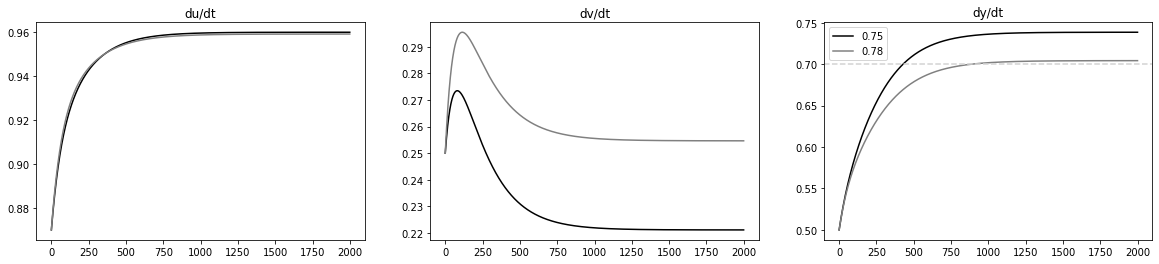

In [6]:
fig, ax = plt. subplots(1,3, figsize=(20,4))
ax[0].plot(t, s1[:,0], 'k', label=r'$du/dt$')
ax[0].plot(t, s2[:,0], 'grey', label=r'$du/dt$')
ax[0].set_title('du/dt')
ax[1].plot(t, s1[:,1], 'k', label = r'$dv/dt$')
ax[1].plot(t, s2[:,1], 'grey', label = r'$dv/dt$')
ax[1].set_title('dv/dt')
ax[2].plot(t, s1[:,2], 'k', label = I1)
ax[2].plot(t, s2[:,2], 'grey', label = I2)
ax[2].axhline(0.7, linestyle='--', color='lightgray')
ax[2].set_title('dy/dt')
ax[2].legend()

## Different inputs with reset

In [3]:
def euler(func, y0, times, I, params): 
    dt = params['dt'] #time steps
    th = params['th'] #target threshold
    y = np.zeros([times.size, 3])  #array to save u,v,y
    y[0] = y0 #initial states
    reset = 0
    reset_list = []
    
    for i, t in enumerate(times[:-1]):
        y[i+1] = y[i] + np.array(func(y[i], t, I, params, reset)) * dt
        reset = float(y[i+1, 2] >= th) #reset 1 if y over th
        reset_list.append(reset)
        
    return y, reset_list

In [4]:
def network(h, t, I, params, reset):
    u, v, y = h
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    sigma = params['sigma']
    
    dudt = (-u + sigmoid(Wut * I - Wuv * v - 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u + 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dydt = (-y + u - v + np.random.randn(1)[0] * sigma) / tau * dt
    
    return [dudt, dvdt, dydt]

In [5]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 1,
              'tau': 100,
              'th': 0.7,
              'sigma': 0.01}

In [6]:
dt = PARAMS_DICT['dt']
I1, I2 = 0.75, 0.78
state_init = [0.87,0.25, 0.5]
time_points = np.arange(0, 3000, dt)
s1, res1 = euler(network, state_init, time_points, I1, PARAMS_DICT)
s2, res2 = euler(network, state_init, time_points, I2, PARAMS_DICT)

where1 = np.where(np.array(res1)==1)[0]
where2 = np.where(np.array(res2)==1)[0]

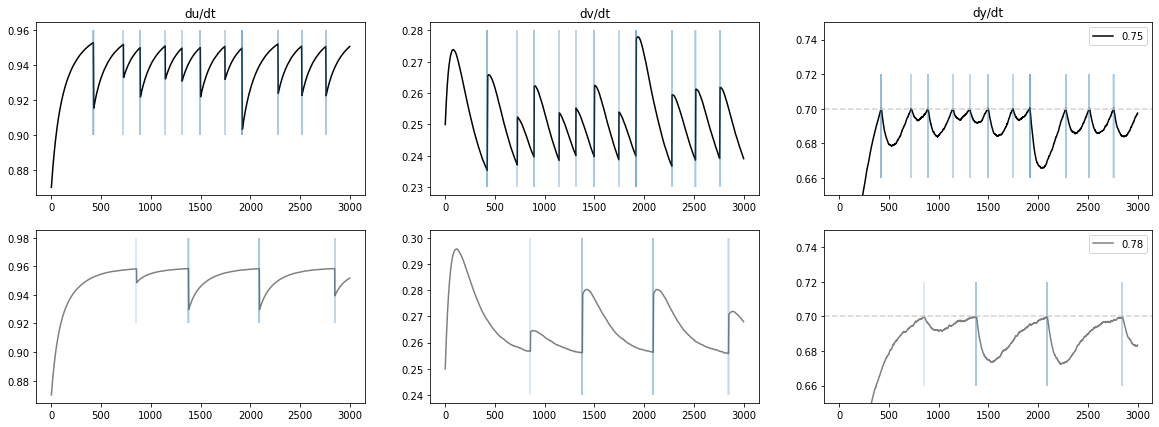

In [16]:
fig, ax = plt. subplots(2,3, figsize=(20,7))
ax.flatten()[0].plot(time_points, s1[:,0], 'k', label=r'$du/dt$')
ax.flatten()[3].plot(time_points, s2[:,0], 'grey', label=r'$du/dt$')
ax.flatten()[0].vlines(where1, 0.9, 0.96, alpha=0.2)
ax.flatten()[3].vlines(where2, 0.92, 0.98, alpha=0.2)
ax.flatten()[0].set_title('du/dt')

ax.flatten()[1].plot(time_points, s1[:,1], 'k', label = r'$dv/dt$')
ax.flatten()[4].plot(time_points, s2[:,1], 'grey', label = r'$dv/dt$')
ax.flatten()[1].set_title('dv/dt')
ax.flatten()[1].vlines(where1, 0.23, 0.28, alpha=0.2)
ax.flatten()[4].vlines(where2, 0.24, 0.3, alpha=0.2)

ax.flatten()[2].plot(time_points, s1[:,2], 'k', label = I1)
ax.flatten()[5].plot(time_points, s2[:,2], 'grey', label = I2)
ax.flatten()[2].vlines(where1, 0.66, 0.72, alpha=0.2)
ax.flatten()[5].vlines(where2, 0.66, 0.72, alpha=0.2)
ax.flatten()[2].set_title('dy/dt')

ax.flatten()[2].axhline(0.7, linestyle='--', color='lightgray')
ax.flatten()[5].axhline(0.7, linestyle='--', color='lightgray')
ax.flatten()[2].set_ylim(0.65, 0.75)
ax.flatten()[5].set_ylim(0.65, 0.75)

ax.flatten()[2].legend()
ax.flatten()[5].legend()

## SAM: adapting I according to duration

$$ \tau \frac{dI}{dt} = sK(y-y_0) $$

In [121]:
def euler_I(func, y0, niter, params, K, reset): 
    dt = params['dt']
    th = params['th']
    
    y = np.zeros([niter+1, 4])  
    y[0] = y0
    reset_lst = []
    
    for i, t in enumerate(range(niter)):
        y[i+1] = y[i] + np.array(func(y[i], t, params, reset, K)) * dt
        reset_lst.append(reset)

    return y[1:], reset_lst

In [122]:
def network_I(h, t, params, reset, K):
    u, v, y, I = h
    Wut = params['Wut']
    Wuv = params['Wut']
    Wvt = params['Wut']
    Wvu = params['Wut']
    dt = params['dt']
    tau = params['tau']
    sigma = params['sigma']
    th = params['th']
    
    dIdt = (reset * K * (y - th)) / tau
    dudt = (-u + sigmoid(Wut * I - Wuv * v - 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dvdt = (-v + sigmoid(Wvt * I - Wvu * u + 50 * reset + np.random.randn(1)[0] * sigma)) / tau
    dydt = (-y + u - v + np.random.randn(1)[0] * sigma) / tau
    return [dudt, dvdt, dydt, dIdt]

In [123]:
def simulate_trial(PARAMS_DICT, duration, nstages, K, initI):
    dt = PARAMS_DICT['dt']
    first_duration = PARAMS_DICT['first_duration']
    uinit = PARAMS_DICT['uinit']
    vinit = PARAMS_DICT['vinit']
    yinit = PARAMS_DICT['yinit']
    
    state_init = [uinit, vinit, yinit, initI]
    
    nbin = int(duration / dt) #400 ms
    nbinfirst = int(first_duration / dt) #750 ms
    
    reset=0.0
    s, r = euler_I(network_I, state_init, nbinfirst, PARAMS_DICT, 0, reset)
    print('first round', reset)
    
    for k in range((nstages - 2) * 2):
        state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
        reset = (reset + 1.0)%2
        print('stages', reset)
        
        if reset == 0:
            s2, r2 = euler_I(network_I, state_init, nbin, PARAMS_DICT, K, reset)
        
        else: #updating I every stage (1 bin)
            if k == 0: # No update of I for first flash
                s2, r2 = euler_I(network_I, state_init, 1, PARAMS_DICT, 0, reset)  
            else: #update I in one bin
                s2, r2 = euler_I(network_I, state_init, 1, PARAMS_DICT, K, reset)
        
        s = np.concatenate((s,s2))
        r.extend(r2)
        
        
    #last run behavior 
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2

    if nstages == 2:
        Keff = 0
    else:
        Keff = K

    #last update    
    s2, r2 = euler_I(network_I, state_init, 1, PARAMS_DICT, Keff, reset)
    s = np.concatenate((s,s2))
    r.extend(r2)

    #behavior
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2
    s2, r2 = euler_I(network_I, state_init, nbin*2, PARAMS_DICT, K, reset)
    r2[nbin] = 1 #where th sould be reached 
    s = np.concatenate((s,s2))
    r.extend(r2)
        
    return s, r

In [124]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.7,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01}

In [125]:
duration = 400
nstages = 4
K = 5.0
dt = PARAMS_DICT['dt']
initI = 0.77

simu, res = simulate_trial(PARAMS_DICT, duration, nstages, K, initI)

first round 0.0
stages 1.0
stages 0.0
stages 1.0
stages 0.0


In [128]:
where = np.where(np.array(res)==1)[0]-1

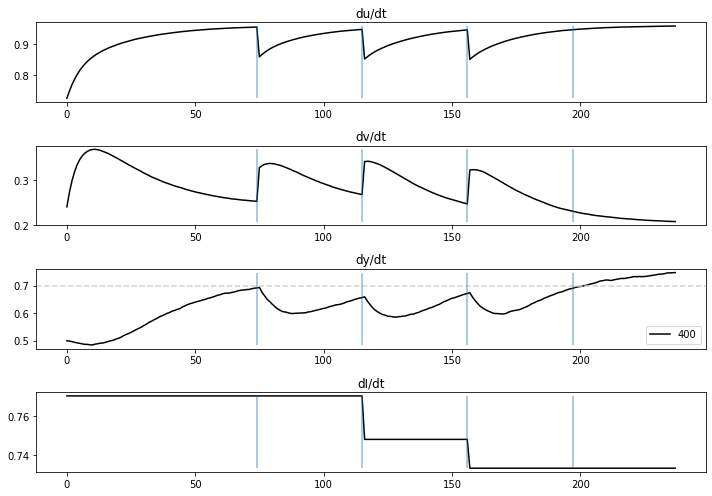

In [130]:
fig, ax = plt. subplots(4,1, figsize=(10,7))
ax[0].plot(simu[:,0], 'k', label=r'$du/dt$')
ax[0].vlines(where, np.min(np.array(simu[:,0])), np.max(np.array(simu[:,0])), alpha=0.5)
ax[0].set_title('du/dt')
ax[1].plot(simu[:,1], 'k', label = r'$dv/dt$')
ax[1].vlines(where, np.min(np.array(simu[:,1])), np.max(np.array(simu[:,1])), alpha=0.5)
ax[1].set_title('dv/dt')
ax[2].plot(simu[:,2], 'k', label = duration)
ax[2].axhline(0.7, linestyle='--', color='lightgray')
ax[2].vlines(where, np.min(np.array(simu[:,2])), np.max(np.array(simu[:,2])), alpha=0.5)
ax[2].set_title('dy/dt')
ax[2].legend()
ax[3].plot(simu[:,3], 'k')
ax[3].vlines(where, np.min(np.array(simu[:,3])), np.max(np.array(simu[:,3])), alpha=0.5)
ax[3].set_title('dI/dt')


plt.tight_layout()

### SAM (paper method)

In [3]:
def network_I2(state_init, PARAMS_DICT, reset, K, niter):
    
    u, v, y, I = state_init
    
    Wut = PARAMS_DICT['Wut']
    Wuv = PARAMS_DICT['Wuv']
    Wvt = PARAMS_DICT['Wvt']
    Wvu = PARAMS_DICT['Wvu']
    dt = PARAMS_DICT['dt']
    tau = PARAMS_DICT['tau']
    sigma = PARAMS_DICT['sigma']
    th = PARAMS_DICT['th']
    IF = PARAMS_DICT['IF']
    
    r = []
    s = np.zeros([niter,4])  
    
    for i in range(niter):
        I += (reset * K * (y - th)) / tau * dt
        u += (-u + sigmoid(Wut * I - Wuv * v - IF * reset + np.random.randn(1)[0] * sigma)) / tau * dt
        v += (-v + sigmoid(Wvt * I - Wvu * u + IF * reset + np.random.randn(1)[0] * sigma)) / tau * dt
        y += (-y + u - v + np.random.randn(1)[0] * sigma) / tau * dt
        
        s[i] = [u, v, y, I]
        r.append(reset)
        
    return s, r

In [4]:
def simulate_trial2(PARAMS_DICT, duration, nstages, K, initI):
    dt = PARAMS_DICT['dt']
    first_duration = PARAMS_DICT['first_duration']
    uinit = PARAMS_DICT['uinit']
    vinit = PARAMS_DICT['vinit']
    yinit = PARAMS_DICT['yinit']
    
    state_init = [uinit, vinit, yinit, initI]
    
    nbin = int(duration / dt) #400 ms
    nbinfirst = int(first_duration / dt) #750 ms
    
    reset=0.0
    s, r = network_I2(state_init, PARAMS_DICT, reset, 0, nbinfirst)
    
    for k in range((nstages - 2) * 2):
        state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
        reset = (reset + 1.0)%2 #switch state 
        print('stages', reset)
        
        if reset == 0: #between flashes
            s2, r2 = network_I2(state_init, PARAMS_DICT, reset, K, nbin)
        
        else: #flash: updating I (1 bin)
            if k == 0: # No update of I for first flash
                s2, r2 = network_I2(state_init, PARAMS_DICT, reset, 0, 1)  
            else: #update I in one bin
                s2, r2 = network_I2(state_init, PARAMS_DICT, reset, K, 1)
        
        s = np.concatenate((s,s2))
        r.extend(r2)
        
        
    #last run behavior 
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2

    if nstages == 2:
        Keff = 0
    else:
        Keff = K

    #last update    
    s2, r2 = network_I2(state_init, PARAMS_DICT, reset, Keff, 1)
    s = np.concatenate((s,s2))
    r.extend(r2)

    #behavior
    state_init = [s[-1,0], s[-1,1], s[-1,2], s[-1,3]]
    reset = (reset + 1.0)%2
    s2, r2 = network_I2(state_init, PARAMS_DICT, reset, K, nbin*2)
    r2[nbin] = 1 #where th sould be reached 
    s = np.concatenate((s,s2))
    r.extend(r2)
    
    return s, r

In [5]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.7,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 1000, 
              'sigma': 0.01}

In [38]:
duration =800
nstages = 4
K = 5.0
dt = PARAMS_DICT['dt']
initI = 0.77

simu, res3 = simulate_trial2(PARAMS_DICT, duration, nstages, K, initI)
where3 = np.where(np.array(res3)==1)[0] -1

stages 1.0
stages 0.0
stages 1.0
stages 0.0


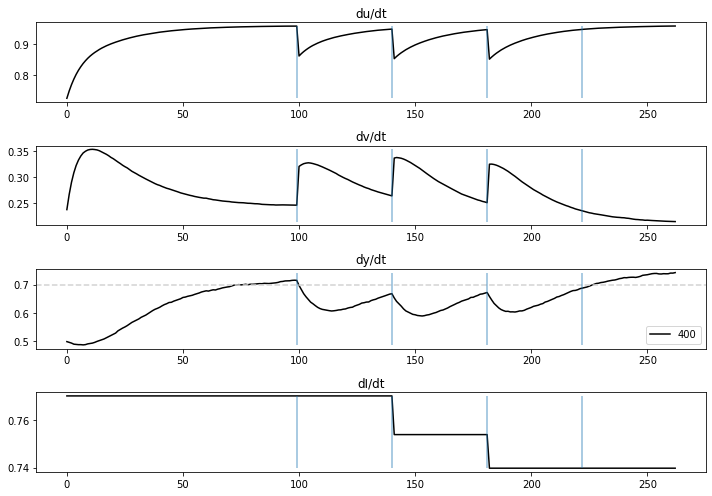

In [27]:
fig, ax = plt. subplots(4,1, figsize=(10,7))
ax[0].plot(simu[:,0], 'k', label=r'$du/dt$')
ax[0].vlines(where, np.min(np.array(simu[:,0])), np.max(np.array(simu[:,0])), alpha=0.5)
ax[0].set_title('du/dt')
ax[1].plot(simu[:,1], 'k', label = r'$dv/dt$')
ax[1].vlines(where, np.min(np.array(simu[:,1])), np.max(np.array(simu[:,1])), alpha=0.5)
ax[1].set_title('dv/dt')
ax[2].plot(simu[:,2], 'k', label = duration)
ax[2].axhline(0.7, linestyle='--', color='lightgray')
ax[2].vlines(where, np.min(np.array(simu[:,2])), np.max(np.array(simu[:,2])), alpha=0.5)
ax[2].set_title('dy/dt')
ax[2].legend()
ax[3].plot(simu[:,3], 'k')
ax[3].vlines(where, np.min(np.array(simu[:,3])), np.max(np.array(simu[:,3])), alpha=0.5)
ax[3].set_title('dI/dt')

plt.tight_layout()

# PCA on one trial

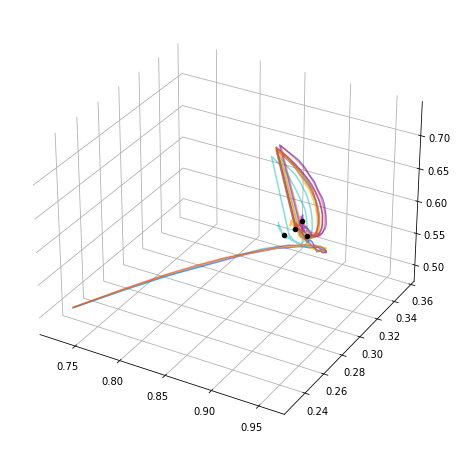

In [39]:

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(simu[:,0], simu[:,1], simu[:,2], 'blue', alpha=0.5) #400
ax.plot3D(simu4[:,0], simu4[:,1], simu4[:,2], 'c', alpha=0.5) #500
ax.plot3D(simu2[:,0], simu2[:,1], simu2[:,2], 'orange', alpha=0.6) #600
ax.plot3D(simu3[:,0], simu3[:,1], simu3[:,2], 'red', alpha=0.4) #800

ax.scatter3D(simu[where[-1],0], simu[where[-1],1], simu[where[-1],2], c='black')
ax.scatter3D(simu4[where4[-1],0], simu4[where4[-1],1], simu4[where4[-1],2], c='black')
ax.scatter3D(simu2[where2[-1],0], simu2[where2[-1],1], simu2[where2[-1],2], c='black')
ax.scatter3D(simu3[where3[-1],0], simu3[where3[-1],1], simu3[where3[-1],2], c='black')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

(0.45, 0.65)

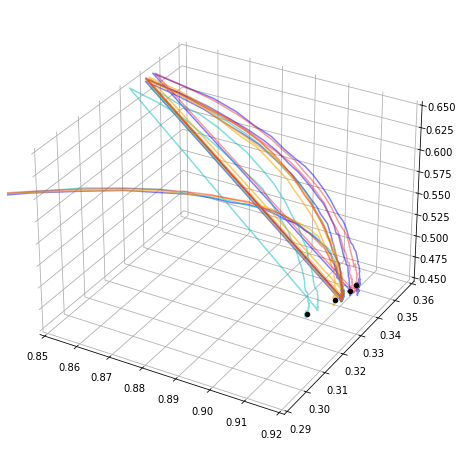

In [40]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(simu[:,0], simu[:,1], simu[:,2], 'blue', alpha=0.5) #400
ax.plot3D(simu4[:,0], simu4[:,1], simu4[:,2], 'c', alpha=0.5) #500
ax.plot3D(simu2[:,0], simu2[:,1], simu2[:,2], 'orange', alpha=0.6) #600
ax.plot3D(simu3[:,0], simu3[:,1], simu3[:,2], 'red', alpha=0.4) #800

ax.scatter3D(simu[where[-1],0], simu[where[-1],1], simu[where[-1],2], c='black')
ax.scatter3D(simu4[where4[-1],0], simu4[where4[-1],1], simu4[where4[-1],2], c='black')
ax.scatter3D(simu2[where2[-1],0], simu2[where2[-1],1], simu2[where2[-1],2], c='black')
ax.scatter3D(simu3[where3[-1],0], simu3[where3[-1],1], simu3[where3[-1],2], c='black')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlim(0.85, 0.92)
ax.set_ylim(0.29, 0.36)
ax.set_zlim(0.45, 0.65)

### **TODO**
- PCA of all stimuli in one space (after one another)

In [22]:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(simu[:,:3])
components = pca.components_
Z = pca.transform(simu[:,:3])

pca2 = PCA()
pca2.fit(simu2[:,:3])
Z2 = pca2.transform(simu2[:,:3])

pca3 = PCA()
pca3.fit(simu3[:,:3])
Z3 = pca3.transform(simu3[:,:3])

pca4 = PCA()
pca4.fit(simu4[:,:3])
Z4 = pca4.transform(simu4[:,:3])

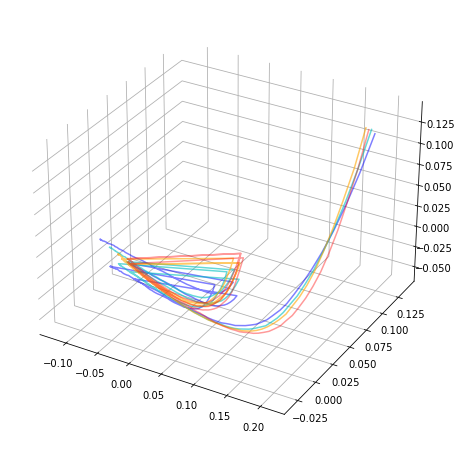

In [25]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(Z[:,0], Z[:,1], Z[:,2], 'blue', alpha=0.5)
ax.plot3D(Z4[:,0], Z4[:,1], Z4[:,2], 'c', alpha=0.6)
ax.plot3D(Z2[:,0], Z2[:,1], Z2[:,2], 'orange', alpha=0.6)
ax.plot3D(Z3[:,0], Z3[:,1], Z3[:,2], 'red', alpha=0.4)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

#ax.set_xlim(-0.1, 0.1)

## 1,2-Go Task with trials

In [199]:
a = 5
b = a
a += 1
b

5

In [248]:
a = np.array([5])
b = a#.copy()
a += 1
b

array([6])

In [112]:
def network(state_init, PARAMS_DICT, reset, K, niter):
    
    u, v, y, I = state_init.copy()
    
    Wut = PARAMS_DICT['Wut']
    Wuv = PARAMS_DICT['Wuv']
    Wvt = PARAMS_DICT['Wvt']
    Wvu = PARAMS_DICT['Wvu']
    dt = PARAMS_DICT['dt']
    tau = PARAMS_DICT['tau']
    sigma = PARAMS_DICT['sigma']
    th = PARAMS_DICT['th']
    IF = PARAMS_DICT['IF']
    ntrials = PARAMS_DICT['ntrials']
    
    r = []
    s = np.zeros([niter,4, ntrials])  
    #s = np.zeros([niter,4, 1])  
    #s = np.zeros([niter,4])  
    
    for i in range(niter):
        I += (reset * K * (y - th)) / tau * dt
        u += (-u + sigmoid(Wut * I - Wuv * v - IF * reset + np.random.randn(ntrials).squeeze() * sigma)) / tau * dt
        v += (-v + sigmoid(Wvt * I - Wvu * u + IF * reset + np.random.randn(ntrials).squeeze() * sigma)) / tau * dt
        y += (-y + u - v + np.random.randn(ntrials).squeeze() * sigma) / tau * dt
        
        s[i] = [u.copy(), v.copy(), y.copy(), I.copy()]
        r.append(reset)
        
    return s, r

In [113]:
def start_network(simulation, reset_lst, PARAMS_DICT, reset, K, nbin, behavior=False):
    state_init = simulation[-1]
    print(state_init.shape)
    s2, r2 = network(state_init, PARAMS_DICT, reset, K, nbin)
    
    print('s2', np.array(s2).shape)
    
    if behavior:
        production = []
        for i in range(PARAMS_DICT['ntrials']):
            p = np.where(s2[:,2,i]>=PARAMS_DICT['th'])[0][0]
            production.append(p)
        simulation = np.concatenate((simulation,s2))
        reset_lst.extend(r2)
        return simulation, reset_lst, production
    
    simulation = np.concatenate((simulation,s2))
    print('simulation', np.array(simulation).shape)
    reset_lst.extend(r2)
    return simulation, reset_lst

In [115]:
def simulate_onetwogo(PARAMS_DICT, duration, K, initI):
    dt = PARAMS_DICT['dt']
    first_duration = PARAMS_DICT['first_duration']
    uinit = PARAMS_DICT['uinit']
    vinit = PARAMS_DICT['vinit']
    yinit = PARAMS_DICT['yinit']
    ntrials = PARAMS_DICT['ntrials']
    
    state_init = [np.ones(ntrials) * uinit, 
                  np.ones(ntrials) * vinit,
                  np.ones(ntrials) * yinit,
                  np.ones(ntrials) * initI]
    #state_init = np.array([[uinit],  [vinit],    [yinit],    [initI]])
    #state_init = np.array([uinit,  vinit,    yinit,    initI])
    print('initial', np.array(state_init).shape)
    
    nbin = int(duration / dt) #400 ms
    nbinfirst = int(first_duration / dt) #750 ms
    
    #first duration
    s, r = network(state_init, PARAMS_DICT, reset=0, K=0, niter=nbinfirst)
    
    print('s', np.array(s).shape)
    
    #first flash, no update
    s, r = start_network(s, r, PARAMS_DICT, reset=1, K=0, nbin=1)
    
    #measurement
    s, r = start_network(s, r, PARAMS_DICT, reset=0, K=K, nbin=nbin)
        
    #flash update I in one bin
    s, r = start_network(s, r, PARAMS_DICT, reset=1, K=K, nbin=1)

    #behavior
    s, r, production = start_network(s, r, PARAMS_DICT, reset=0, K=K, nbin=nbin*2, behavior=True)
    r[nbinfirst+2*nbin] = 1 #where th sould be reached
    
    return s, r, production

In [116]:
PARAMS_DICT = {'Wut': 6,
              'Wuv': 6,
              'Wvt': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.7,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
             'ntrials':100}

In [182]:
duration = 400
K = 5.0
dt = PARAMS_DICT['dt']
first_duration = PARAMS_DICT['first_duration']
th = PARAMS_DICT['th']
initI = 0.77

simu, res, production = simulate_onetwogo(PARAMS_DICT, duration, K, initI)
where = np.where(np.array(res)==1)[0] -1
production_ = first_duration/dt + duration/dt + np.array(production)

initial (4, 100)
s (75, 4, 100)
(4, 100)
s2 (1, 4, 100)
simulation (76, 4, 100)
(4, 100)
s2 (40, 4, 100)
simulation (116, 4, 100)
(4, 100)
s2 (1, 4, 100)
simulation (117, 4, 100)
(4, 100)
s2 (80, 4, 100)


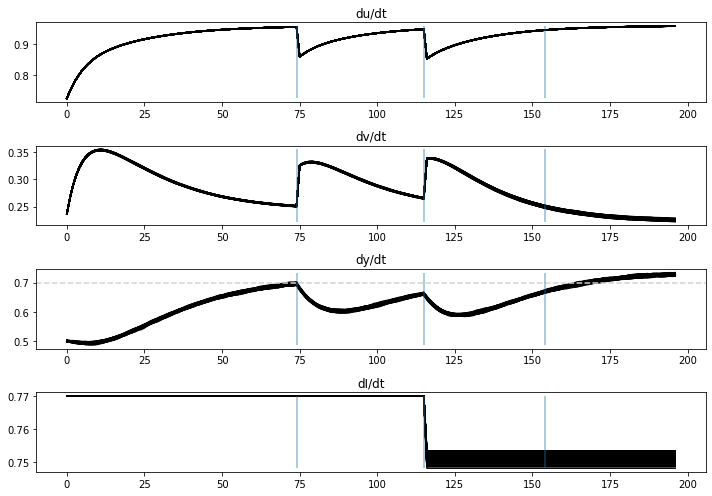

In [183]:
fig, ax = plt. subplots(4,1, figsize=(10,7))
ax[0].plot(simu[:,0], 'k', label=r'$du/dt$')
ax[0].vlines(where, np.min(np.array(simu[:,0])), np.max(np.array(simu[:,0])), alpha=0.5)
ax[0].set_title('du/dt')
ax[1].plot(simu[:,1], 'k', label = r'$dv/dt$')
ax[1].vlines(where, np.min(np.array(simu[:,1])), np.max(np.array(simu[:,1])), alpha=0.5)
ax[1].set_title('dv/dt')
ax[2].plot(simu[:,2], 'k', label = duration)
ax[2].axhline(th, linestyle='--', color='lightgray')
ax[2].vlines(where, np.min(np.array(simu[:,2])), np.max(np.array(simu[:,2])), alpha=0.5)
#ax[2].plot(production_, 'x', c='r')
ax[2].set_title('dy/dt')
#ax[2].legend()
ax[3].plot(simu[:,3], 'k')
ax[3].vlines(where, np.min(np.array(simu[:,3])), np.max(np.array(simu[:,3])), alpha=0.5)
ax[3].set_title('dI/dt')

plt.tight_layout()

In [117]:
import OneTwoGo as otg

In [118]:
duration = 1100
K = 5.0
dt = PARAMS_DICT['dt']
first_duration = PARAMS_DICT['first_duration']
th = PARAMS_DICT['th']
initI = 0.77

simu, res, production = otg.simulate_onetwogo(PARAMS_DICT, duration, K, initI)
where = np.where(np.array(res)==1)[0] -1

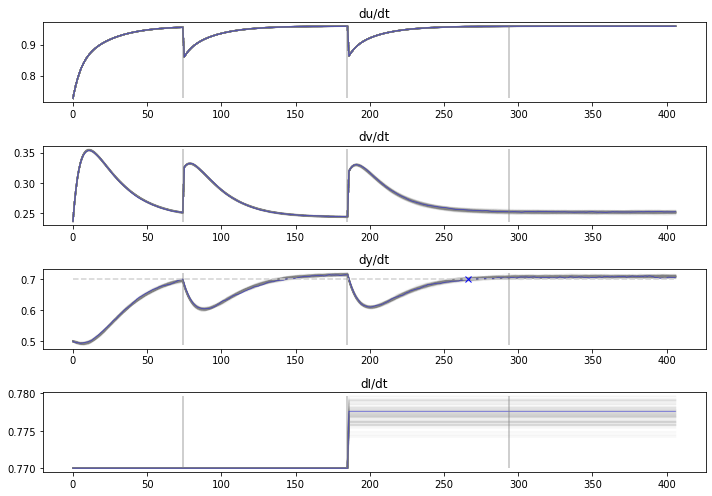

In [124]:
t=5
fig, ax = plt. subplots(4,1, figsize=(10,7))
ax[0].plot(simu[:,0], c='grey', alpha=0.05)
ax[0].plot(simu[:,0, t], c='b', linewidth=0.7,  alpha=0.5)
ax[0].vlines(where, np.min(np.array(simu[:,0])), np.max(np.array(simu[:,0])), color='grey',alpha=0.5)
ax[0].set_title('du/dt')
ax[1].plot(simu[:,1], 'grey', alpha=0.05)
ax[1].plot(simu[:,1, t], 'blue', linewidth=0.7, alpha=0.5)
ax[1].vlines(where, np.min(np.array(simu[:,1])), np.max(np.array(simu[:,1])), color='grey', alpha=0.5)
ax[1].set_title('dv/dt')
ax[2].plot(simu[:,2], 'grey', label = duration, alpha=0.05)
ax[2].plot(simu[:,2, t], 'blue',linewidth=0.7,  alpha=0.5)
ax[2].hlines(th, 0,first_duration/dt+duration/dt+2*duration/dt,linestyle='--', color='lightgray')
ax[2].vlines(where, np.min(np.array(simu[:,2])), np.max(np.array(simu[:,2])), color='grey',alpha=0.5)
ax[2].plot(first_duration/dt+duration/dt+production[5], th, 'x', c='blue')
ax[2].set_title('dy/dt')
#ax[2].legend()
ax[3].plot(simu[:,3], 'grey', alpha=0.05)
ax[3].plot(simu[:,3, 5], 'blue',linewidth=0.7,  alpha=0.5)
ax[3].vlines(where, np.min(np.array(simu[:,3])), np.max(np.array(simu[:,3])), color='grey',alpha=0.5)
ax[3].set_title('dI/dt')

plt.tight_layout()

In [64]:
def stats(production, dt):
    production = np.array(production)*dt
    mean = np.mean(production)
    std = np.std(production)
    return mean, std

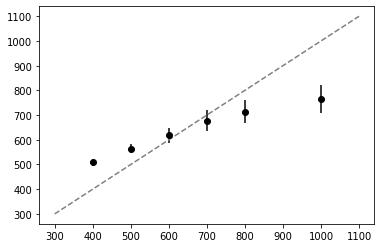

In [67]:
K = 5.0
dt = PARAMS_DICT['dt']
initI = 0.77

for stim in [400,500,600,700,800,1000]:
    simu, res, production = otg.simulate_onetwogo(PARAMS_DICT, stim, K, initI)
    mean, std, std_s = otg.statistics(production, dt)
    plt.errorbar(stim, mean, yerr=std, fmt='-o', c='k')
plt.plot( [300,1100],[300,1100], c='grey', linestyle='--')